# Generating Plots

Having now trained a large combination of models we want to visualize the results to try and identify patterns in model performance

In [1]:
import os
from pathlib import Path
import sys
colab = False
import warnings
warnings.filterwarnings('ignore')

Change the directory to the repository and pull latest changes (if any). Display the directory content and set basic datapaths.

In [2]:
%cd ..
! ls

C:\Users\ibes222\Documents\Master\SS20\NLPLab\GitHub


Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## Constants

In [15]:
ROOT = Path(os.getcwd())
DATA = ROOT/'data'
SRC =  ROOT/'src'
RAW_DATA = DATA/'raw'
RECORDS = ROOT/'records'
RESTAURANT_ATTRIBUTES = RECORDS/'restaurants'/'attribute_activation_experiments'
#RESTAURANT_ENTITIES = RECORDS/'restaurants'/'entity_activation_experiments'
ATTR_FILES = os.listdir(RESTAURANT_ATTRIBUTES)
#ENT_FILES = os.listdir(RESTAURANT_ENTITIES)
print(ROOT)

C:\Users\ibes222\Documents\Master\SS20\NLPLab\GitHub


In [16]:
sys.path.append(str(SRC))

## Imports

In [17]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import plots

In [18]:
if '.gitignore' in ATTR_FILES:
    ATTR_FILES.remove('.gitignore')
#if '.gitignore' in ENT_FILES:
#    ENT_FILES.remove('.gitignore')

## Importing Data 

In [19]:
attr_logs = plots.load_logs_as_df(RESTAURANT_ATTRIBUTES, ATTR_FILES)
#ent_logs = plots.load_logs_as_df(RESTAURANT_ENTITIES, ENT_FILES)


In [20]:
#logs = pd.concat([attr_logs, ent_logs])
logs = attr_logs

In [21]:
logs.head()

,filename,abae_losses,classifier_losses,classifier_train_performance,classifier_eval_performance,dataset,label,embedding,binary,binary_target_class,...,save_model_path,use_micro_average,train_entities,target_class,freeze,save_training_records,use_linmodel,switch_to_relu,activation,records_data_path
0,training_2020-06-25_12-57-03,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.6615146831530139, 'recall': 0.957494...","[{'f1': 0.6292134831460674, 'recall': 0.84, 'p...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,False,True,True,False,relu,records/restaurants/attribute/
1,training_2020-06-25_13-01-17,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...","[{'f1': 0.18181818181818182, 'recall': 0.11, '...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,False,True,True,False,tanh,records/restaurants/attribute/
2,training_2020-06-25_13-07-41,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.6654261257908448, 'recall': 1.0, 'pr...","[{'f1': 0.704225352112676, 'recall': 1.0, 'pre...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,False,True,True,False,sigmoid,records/restaurants/attribute/
3,training_2020-06-25_13-15-05,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,False,True,True,False,softmax,records/restaurants/attribute/
4,training_2020-06-25_13-23-16,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 0...","[{'f1': 0.23357664233576644, 'recall': 0.73563...","[{'f1': 0.3255813953488372, 'recall': 0.7, 'pr...",restaurants,attribute,bert-base-cased,True,MISCELLANEOUS,...,models/restaurants/attribute/,True,False,MISCELLANEOUS,False,True,True,False,relu,records/restaurants/attribute/


In [22]:
attributes = attr_logs[attr_logs.binary].binary_target_class.dropna().unique().tolist()

In [23]:
attributes

['GENERAL', 'MISCELLANEOUS', 'PRICES', 'QUALITY', 'STYLE_OPTIONS', 'NaN']

In [12]:
#entities = logs[logs.label.eq('entity')].binary_target_class.unique().tolist()

In [13]:
#entities

We appears to be missing STYLE_OPTIONS attribute and LOCATION entity

## Generating Plots 

### Attributes Binary 

In [24]:
selection = {
    'dataset': 'restaurants',
     'train_entities': False,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': True,
     'binary': True,
     'lr': [0.0005, 5e-05],
     'binary_target_class': 'GENERAL'
}

In [25]:
att_rows_kcl = []
att_rows_mcl = []
for att in attributes:
    selection['binary_target_class'] = att
    selection['use_kcl'] = True
    att_rows_kcl.append(plots.get_rows(logs, selection))
    selection['use_kcl'] = False
    att_rows_mcl.append(plots.get_rows(logs, selection))
    

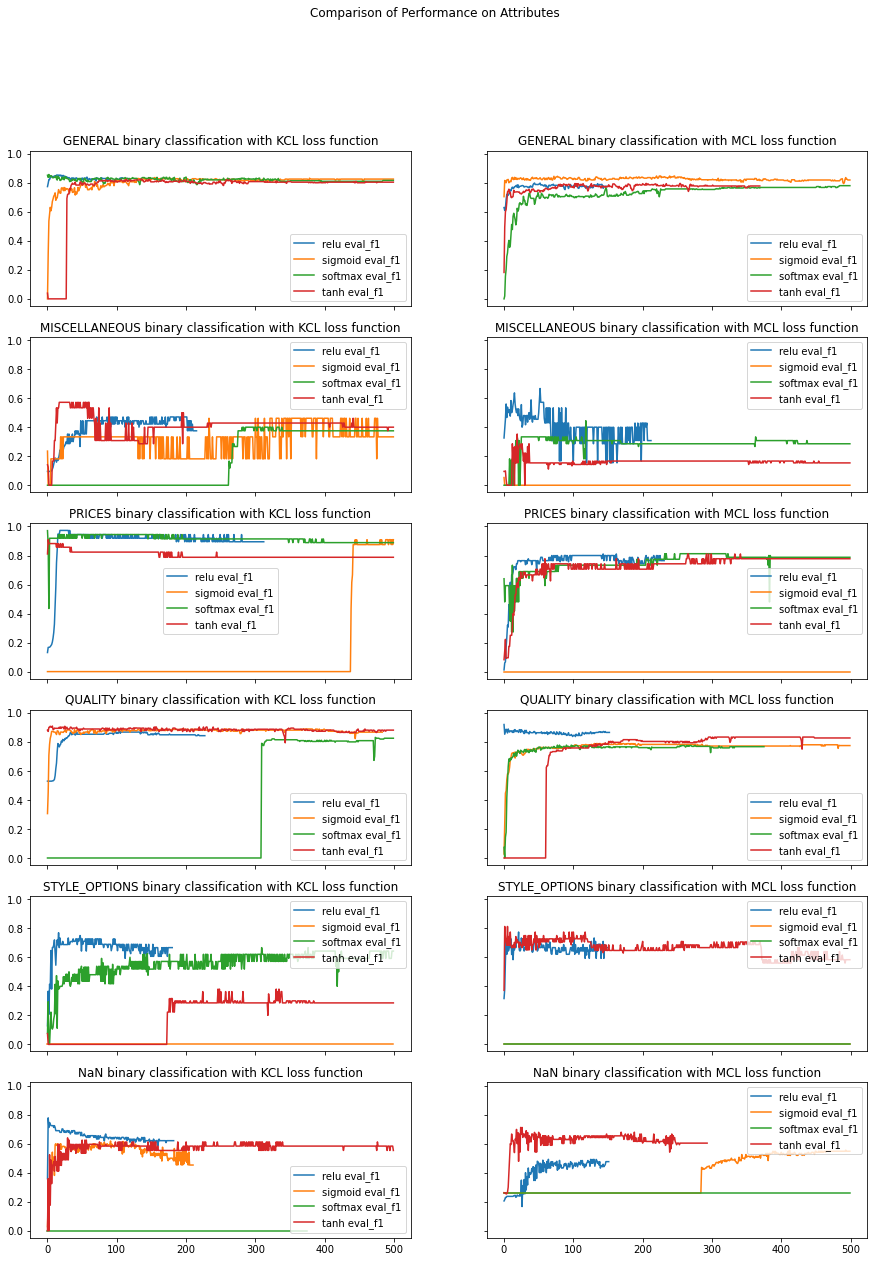

In [26]:
title = '{} binary classification with {} loss function'

fig, axs = plt.subplots(len(attributes), 2, sharex=True, sharey=True,figsize=(15,20))
fig.suptitle('Comparison of Performance on Attributes')

for index, (kcl, mcl, attribute) in enumerate(itertools.zip_longest(att_rows_kcl, att_rows_mcl, attributes)):
    plots.plot_performance(kcl, 'activation', metric='f1', subplot=axs[index,0], title=title.format(attribute, 'KCL'))
    plots.plot_performance(mcl, 'activation', metric='f1', subplot=axs[index,1], title=title.format(attribute, 'MCL'))

### Entity Binary

In [20]:
selection = {
    'dataset': 'restaurants',
     'train_entities': True,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': True,
     'binary': True,
     'lr': [0.0005, 5e-05],
     'binary_target_class': 'GENERAL',
     'output_dim':7,
}

In [21]:
entities.remove('NaN')

In [22]:
ent_rows_kcl = []
ent_rows_mcl = []

for ent in entities:
    selection['binary_target_class'] = ent
    selection['use_kcl'] = True
    ent_rows_kcl.append(plots.get_rows(logs, selection))
    selection['use_kcl'] = False
    ent_rows_mcl.append(plots.get_rows(logs, selection))

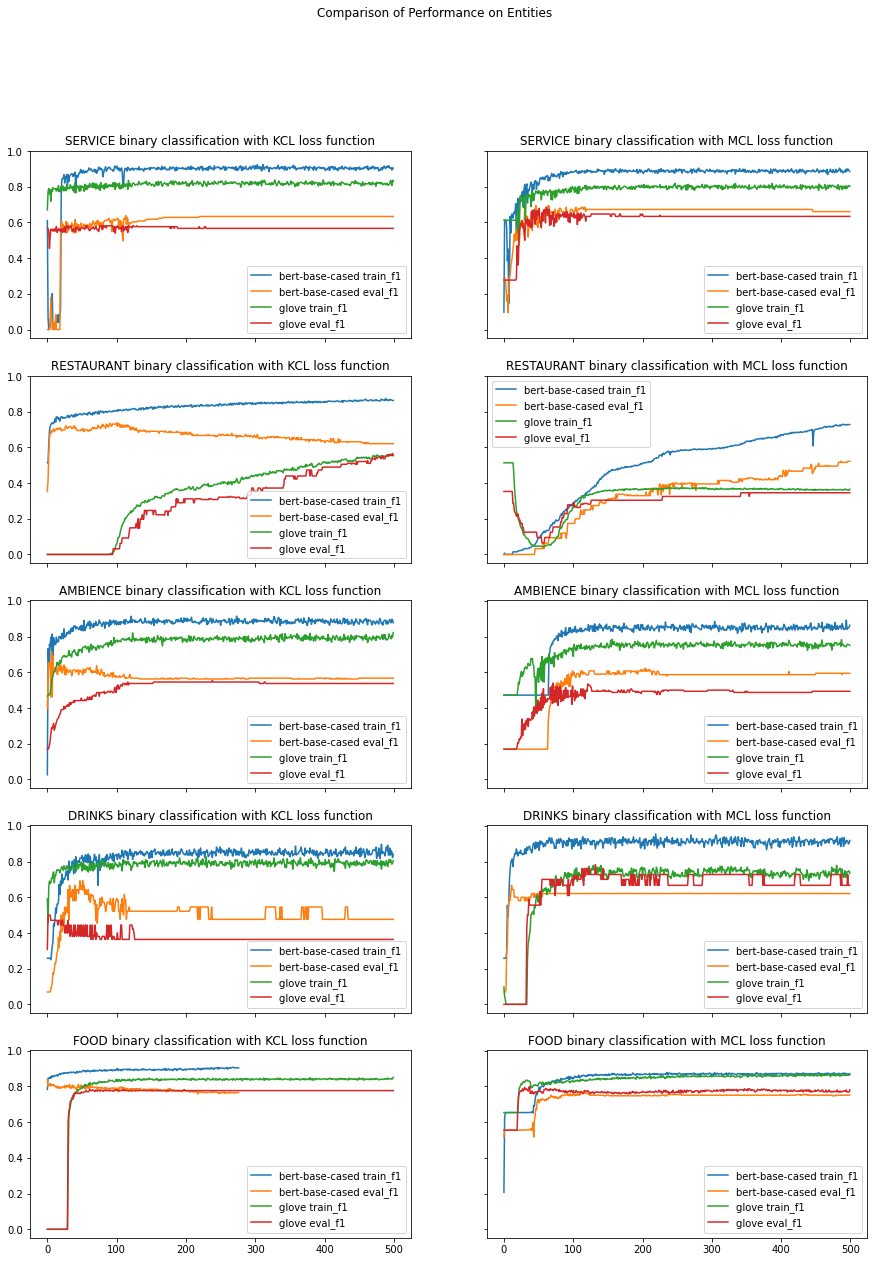

In [23]:
title = '{} binary classification with {} loss function'

fig, axs = plt.subplots(len(entities), 2, sharex=True, sharey=True,figsize=(15,20))
fig.suptitle('Comparison of Performance on Entities')

for index, (kcl, mcl, entity) in enumerate(itertools.zip_longest(ent_rows_kcl, ent_rows_mcl, entities)):
    plots.plot_performance(kcl, 'embedding', metric='f1', subplot=axs[index,0], title=title.format(entity, 'KCL'))
    plots.plot_performance(mcl, 'embedding', metric='f1', subplot=axs[index,1], title=title.format(entity, 'MCL'))

### Selecting Rows - Attributes Multiclass 

Things to vary are:

- embedding
- loss function
- attribute or entity

In [24]:
selection = {
    'dataset': 'restaurants',
     'train_entities': False,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': True,
     'binary': False,
     'lr': [0.0005, 5e-05],
}
kcl_attributes = plots.get_rows(logs, selection)

In [25]:
selection = {
    'dataset': 'restaurants',
     'train_entities': False,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': False,
     'binary': False,
     'lr': [0.0005, 5e-05],
}
mcl_attributes = plots.get_rows(logs, selection)

In [26]:
selection = {
    'dataset': 'restaurants',
     'train_entities': True,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': True,
     'binary': False,
     'lr': [0.0005, 5e-05],
}
kcl_entities = plots.get_rows(logs, selection)

In [27]:
selection = {
    'dataset': 'restaurants',
     'train_entities': True,
     'embedding': ['glove', 'bert-base-cased'],
     'use_kcl': False,
     'binary': False,
     'lr': [0.0005, 5e-05],
}
mcl_entities = plots.get_rows(logs, selection)

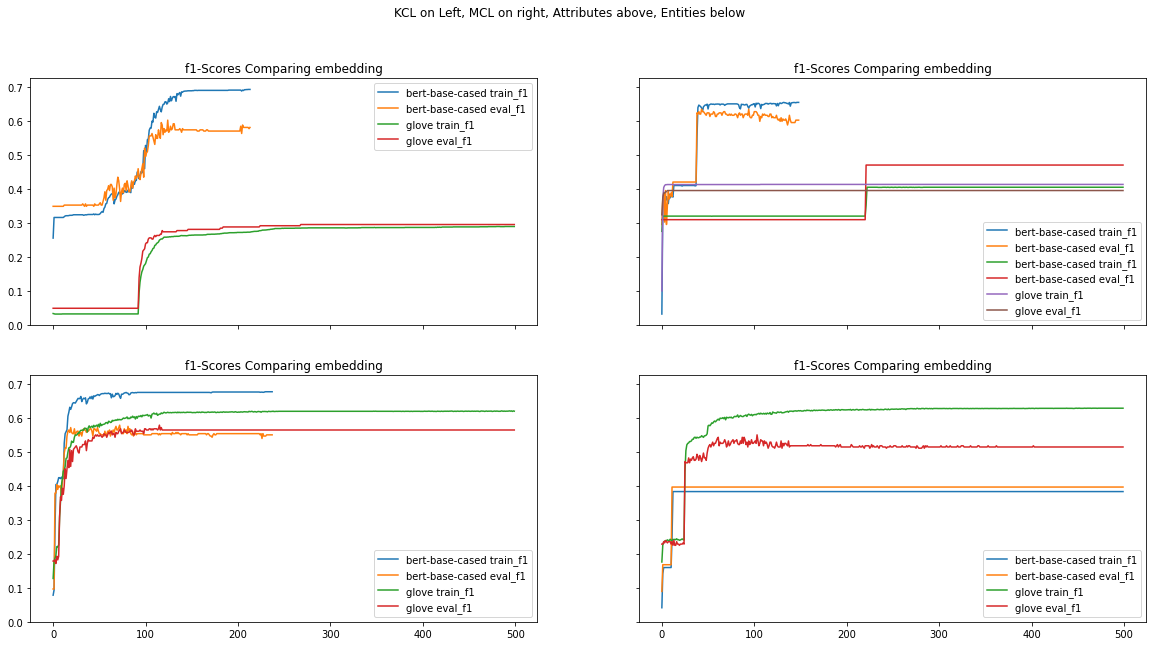

In [28]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(20,10))

fig.suptitle('KCL on Left, MCL on right, Attributes above, Entities below')
plots.plot_performance(kcl_attributes, 'embedding', metric='f1', subplot=axs[0,0])
plots.plot_performance(mcl_attributes, 'embedding', metric='f1', subplot=axs[0,1])
plots.plot_performance(kcl_entities, 'embedding', metric='f1', subplot=axs[1,0])
plots.plot_performance(mcl_entities, 'embedding', metric='f1', subplot=axs[1,1])